# Melbourne Housing Market

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 21 columns):
Suburb           29217 non-null object
Address          29217 non-null object
Rooms            29217 non-null int64
Type             29217 non-null object
Price            22850 non-null float64
Method           29217 non-null object
SellerG          29217 non-null object
Date             29217 non-null object
Distance         29217 non-null float64
Postcode         29217 non-null int64
Bedroom2         22665 non-null float64
Bathroom         22659 non-null float64
Car              22357 non-null float64
Landsize         19649 non-null float64
BuildingArea     11817 non-null float64
YearBuilt        13473 non-null float64
CouncilArea      29215 non-null object
Lattitude        22878 non-null float64
Longtitude       22878 non-null float64
Regionname       29215 non-null object
Propertycount    29215 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 4.7+ MB


In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,29217.000000,2.285000e+04,29217.000000,29217.000000,22665.000000,22659.000000,22357.000000,19649.000000,11817.000000,13473.000000,22878.000000,22878.000000,29215.000000
mean,3.013451,1.056543e+06,10.826519,3113.517952,3.029605,1.601174,1.682784,581.161382,157.422735,1964.937876,-37.812002,145.001545,7535.831936
std,0.975952,6.466137e+05,6.501154,102.778677,0.996666,0.721436,0.995973,3591.192385,427.686929,37.421665,0.085665,0.114382,4421.509141
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000
25%,2.000000,6.370000e+05,6.300000,3049.000000,2.000000,1.000000,1.000000,200.000000,99.000000,1940.000000,-37.861300,144.936700,4380.000000
50%,3.000000,8.800000e+05,10.100000,3103.000000,3.000000,1.000000,2.000000,486.000000,132.000000,1970.000000,-37.808800,145.006400,6567.000000
75%,4.000000,1.300000e+06,13.800000,3152.000000,4.000000,2.000000,2.000000,665.000000,184.000000,2000.000000,-37.757393,145.068630,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.395100,145.526350,21650.000000


In [8]:
df['Suburb'].nunique()

346

In [10]:
df['Suburb'].value_counts().head(5)

Reservoir         735
Bentleigh East    514
Richmond          484
Glen Iris         445
Preston           414
Name: Suburb, dtype: int64

In [69]:
df['CouncilArea'].nunique()

33

In [70]:
df['CouncilArea'].value_counts().head(5)

Boroondara City Council    3223
Darebin City Council       2444
Moreland City Council      1850
Glen Eira City Council     1760
Melbourne City Council     1731
Name: CouncilArea, dtype: int64

In [11]:
df['SellerG'].nunique()

358

In [12]:
df['SellerG'].value_counts().head(5)

Jellis           2854
Nelson           2802
Barry            2604
hockingstuart    2288
Marshall         1762
Name: SellerG, dtype: int64

(array([  1.59000000e+02,   1.25000000e+02,   4.48000000e+02,
          9.64000000e+02,   1.28200000e+03,   1.78600000e+03,
          1.65300000e+03,   1.27900000e+03,   9.56000000e+02,
          7.35000000e+02,   5.76000000e+02,   4.22000000e+02,
          3.06000000e+02,   2.58000000e+02,   1.84000000e+02,
          1.68000000e+02,   1.19000000e+02,   6.80000000e+01,
          7.30000000e+01,   4.20000000e+01,   3.90000000e+01,
          2.80000000e+01,   1.60000000e+01,   1.90000000e+01,
          7.00000000e+00,   1.90000000e+01,   1.30000000e+01,
          1.00000000e+01,   3.00000000e+00,   4.00000000e+00,
          5.00000000e+00,   5.00000000e+00,   3.00000000e+00,
          6.00000000e+00,   2.00000000e+00,   6.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
        

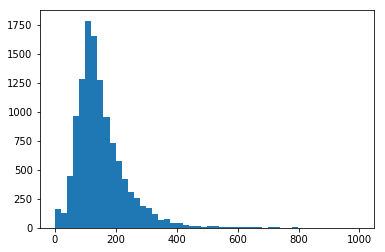

In [79]:
plt.hist(df['BuildingArea'][np.logical_and(df['BuildingArea'].apply(lambda x: not pd.isnull(x)),df['BuildingArea']<1000)],50)

In [80]:
def price_mq(df_col):
    price = df_col[0]
    area = df_col[1]
    if area > 0 and not pd.isnull(area):
        return round(price/area,2)
    else:
        return None

In [81]:
df['Price_EUR'] = df['Price'].apply(lambda x: round(x*0.651199,2))
df['Price_mq'] = df[['Price_EUR','BuildingArea']].apply(price_mq, axis=1)

In [49]:
df[['Price_EUR','Price_mq']].describe()

,Price_EUR,Price_mq
count,2.285000e+04,9.114000e+03
mean,6.880199e+05,7.184242e+03
std,4.210742e+05,3.623536e+04
min,5.535192e+04,1.982000e+01
25%,4.148138e+05,3.532488e+03
50%,5.730551e+05,4.723235e+03
75%,8.465587e+05,6.104990e+03
max,7.293429e+06,2.482371e+06


In [50]:
df[['Price_EUR','Price_mq']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 2 columns):
Price_EUR    22850 non-null float64
Price_mq     9114 non-null float64
dtypes: float64(2)
memory usage: 456.6 KB


In [13]:
import seaborn as sns

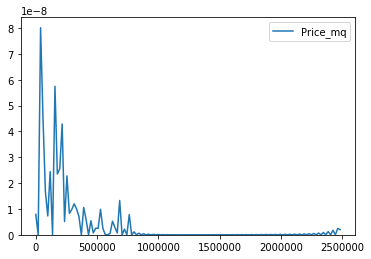

In [63]:
sns.kdeplot(df['Price_mq'][df['Price_mq'].apply(lambda x: not pd.isnull(x))])

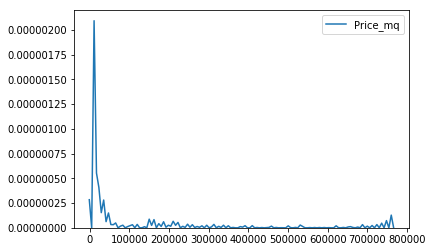

In [64]:
sns.kdeplot(df['Price_mq'][np.logical_and(df['Price_mq'].apply(lambda x: not pd.isnull(x)), df['Price_mq']<1000000)])

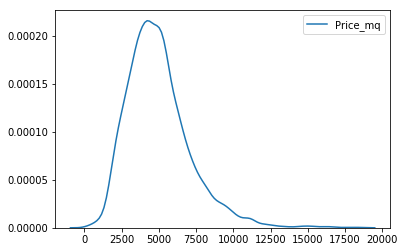

In [66]:
sns.kdeplot(df['Price_mq'][np.logical_and(df['Price_mq'].apply(lambda x: not pd.isnull(x)), df['Price_mq']<20000)])

In [67]:
df['Price_mq'][df['Price_mq']<20000].describe()

count     8990.000000
mean      4982.750877
std       2148.964737
min         19.820000
25%       3522.695000
50%       4692.790000
75%       6035.500000
max      18532.550000
Name: Price_mq, dtype: float64

In [68]:
df[df['Price_mq']>1000000].head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_EUR,Price_mq
19274,Balwyn,27 Burroughs Rd,5,h,3812000.0,S,VICProp,29/07/2017,7.9,3103,...,729.0,1.0,2012.0,Boroondara City Council,-37.806,145.09511,Southern Metropolitan,5682.0,2482370.59,2482370.59
